In [2]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [3]:
import time
from LandMPC_template.MPCLandControl import MPCLandControl
from src.rocket import Rocket, perturb_rocket
from src.pos_rocket_vis import *

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [6]:
sim_time = 10 # simulation length in seconds
x0 = np.array([0,0,0,0,0,30*np.pi/180,0,0,0,3,2,10]) # w, phi, v, p
x_ref = np.array([0.]*9+[1.,0.,3.])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)
A, B = rocket.linearize(xs, us)

# MPC parameters
H = 20
# Merge four linear mpc
mpc = MPCLandControl().new_controller(rocket, Ts, H, x_ref=x_ref)

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


Simulating time 0.00


c:\Users\tomso\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\reductions\solvers\solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



 State alpha violation: 0.20 > 0.17, 
 State alpha violation: 0.23 > 0.17, 
 State alpha violation: 0.25 > 0.17, 
 State alpha violation: 0.27 > 0.17, 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.27 > 0.17, 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.26 > 0.17, 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.24 > 0.17, 
 State beta violation: -0.21 < -0.17, 
 State alpha violation: 0.22 > 0.17, 
 State beta violation: -0.22 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
 State beta violation: -0.22 < -0.17, 
 State beta violation: -0.23 < -0.17, 
 State beta violation: -0.22 < -0.17, 
 State beta violation: -0.21 < -0.17, 
 State beta violation: -0.19 < -0.17, Simulating time 1.00
Simulating time 2.00
Simulating time 3.00
Simulating time 4.00
Simulating time 5.00
Simulating time 6.00
Simulating time 7.00
Simulating time 8.00
Simulating time 9.00


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

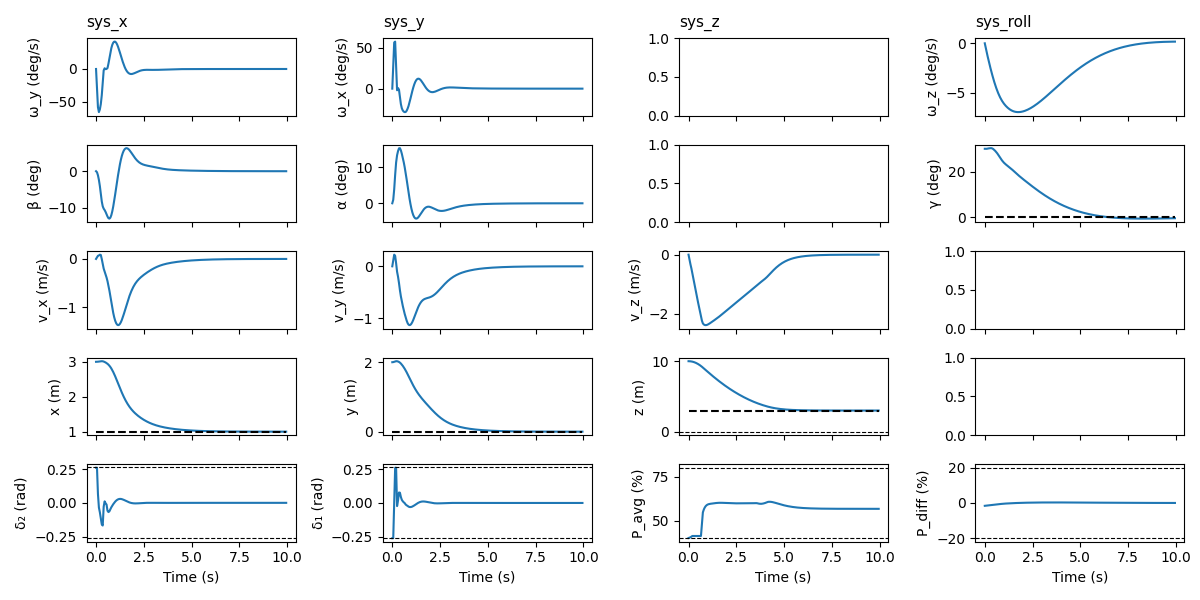

In [7]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(mpc, sim_time, H, x0)
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)
